# Curso de Métodos Numéricos (DEMAT)
# Tarea 7

| Descripción:                         | Fechas                  |
|--------------------------------------|-------------------------|
| Fecha de publicación del documento:  | **Octubre  6, 2023**    |
| Fecha límite de entrega de la tarea: | **Octubre 16, 2023**    |

## Indicaciones

Puede escribir el código de los algoritmos que se piden en una
celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para
usarlas en este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que **incluya
  el notebook** y los archivos adicionales.
- Si todos los códigos que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimir el notebook
  y puede anexar este archivo en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del
  Classroom como un archivo independiente.
  **No incluya el PDF dentro del ZIP**, porque la idea que lo pueda accesar
  directamente para poner anotaciones y la calificación de cada ejercicio.

## Ejercicio 1 (5 puntos)

Resolver el poblema de mínimos cuadrados lineales para ajustar un plano
$c_0 + c_1x_1 + c_2 x_2$  a un conjunto de datos

$$\{(x_{11}, x_{12}, y_1), (x_{21}, x_{22}, y_2), (x_{31}, x_{32}, y_3), ..., (x_{m1}, x_{m2}, y_m)\},$$

de modo que $y_i = c_0 + c_1x_{i1} + c_2 x_{i2} + \epsilon_i$, para $i=1,2,...,m$.

1. Escriba la matriz $\mathbf{A}$  que corresponde
   al problema de minimización  
   
$$ \min_x \| \mathbf{A}\mathbf{c} - \mathbf{y}  \|_2^2, $$

   donde
   
$$ \mathbf{c} = \begin{pmatrix} c_0 \\ c_1 \\ c_2 \end{pmatrix}, \quad \text{y} \quad
   \mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_m \end{pmatrix}.
$$

2. Escriba una función que calcule la solución del problema de mínimos
   cuadrados. Aplique la factorización de Cholesky para resolver el sistema
   de ecuaciones $\mathbf{A}^\top\mathbf{A}\mathbf{c} = \mathbf{A}^\top\mathbf{y}$.

**Entradas de la función:**
- La matriz $\mathbf{A}$,
- El arreglo $\mathbf{y}$,

**Salida de la función:**
- La función debe devolver el arreglo $\mathbf{c}$ de la solución
  del problema de minimos cuadrados o `None` si no se pudo obtenerla.
- El valor la raíz cuadrada del error cuadrático medio (RMSE). Para calcular
  esto puede usar la implementación de Python vista en la Ayudantía 6 o
  calcular $y_{pred,i} = c_0 + c_1x_{i1} + c_2 x_{i2}$ para $i=1,2,...,m$
  y programar la fórmula

$$ RMSE = \sqrt{\frac{\sum_{i=1}^m (y_i - y_{pred,i})^2 }{m}}.  $$

   
3. Probar el algoritmo usando los arreglos de datos `D1` y `D2` que se generan en las celdas
   que aparecen más adelante. Estos arreglos son de la forma
   
$$
\mathbf{D} = \left[\begin{array}{ccc}
x_{11}  & x_{12}  & y_1 \\
x_{21}  & x_{22}  & y_2 \\
\vdots  & \vdots  & \vdots \\
x_{m1}  & x_{m2}  & y_m \\
\end{array} \right]
$$
   
   Use la información en estos arreglos para definir la matriz $\mathbf{A}$ y
   el arreglo $\mathbf{y}$.
   
   Si el problema de mínimos cuadrados tiene solución, imprima la
   solución y valor del RMSE.
   
   ¿Se parecen los valores estimados de los coeficientes $c_i$ estimados a los
   verdaderos valores de los coeficientes que se usaron para generar los datos
   cuando se tienen más datos o menos datos?
   
### Solución:

En este caso la matriz se $A$ se se como
$$
A = \begin{bmatrix}
1 & x_{11} & x_{21}\\
1 & x_{12} & x_{22}\\
\vdots & \vdots & \vdots\\
1 & x_{1m} & x_{2m}
\end{bmatrix}
$$

Primero cremos las funciones, despues grafiquemos y hagamos las pruebas.


In [106]:
## Funciones de la tarea 4
import numpy as np

def forwardSubstitution(L: np.ndarray, b: np.ndarray, t):
  d = L.shape[0]
  res = np.zeros(d)
  for i in range(d):
    sum = np.dot(res[:i], L[i, :i])
    if np.abs(L[i, i]) <= t:
        print(L[i, i])
        return None
    x = (b[i] - sum)/L[i, i]
    res[i] = x

  return res

def backwardSubstitution(U: np.ndarray, b: np.ndarray, t):
    d = U.shape[0]
    res = np.zeros(d)
    for i in reversed(range(d)):
        sum = np.dot(res[i:], U[i, i:])
        if abs(U[i, i]) < t:
            print(U[i, i], t)
            return None
        x = (b[i] - sum)/U[i, i]
        res[i] = x
    return res


In [107]:
import numpy as np

def factchol(A: np.ndarray, t:float):
    L = np.zeros(A.size).reshape(A.shape)
    for i in range(A.shape[0]):
        if (r := A[i, i] - sum(L[i, :i]**2)) < 0 or abs(np.sqrt(r)) < t:
            return None
        L[i, i] = np.sqrt(r)
        for j in range(i+1, A.shape[0]):
            L[j, i] = (A[j, i]- L[j,:i].dot(L[i, :i]))/L[i, i]
    return L



In [108]:
def SolveCholesky(A: np.ndarray, b:np.ndarray, t):
    if (L := factchol(A, t)) is not None:
        y = forwardSubstitution(L, b, t)
        x = backwardSubstitution(L.T, y, t)
        return x

In [109]:
# Celda para importar o programar la función que resuelve el problema de mínimos cuadrados

def solveLSM(A: np.ndarray, y:np.ndarray):
    """Resulve el problema de minimos cuadrados al resolver A.TAc = A.Ty para c"""
    b = A.T @ y
    A = A.T @ A
    t = np.finfo(float).eps**(2/3)
    return SolveCholesky(A, b, t)

In [110]:
def RMSE(y: np.ndarray, yp:np.ndarray):
    m = y.size
    return np.sqrt((y-yp)@(y-yp)/m)

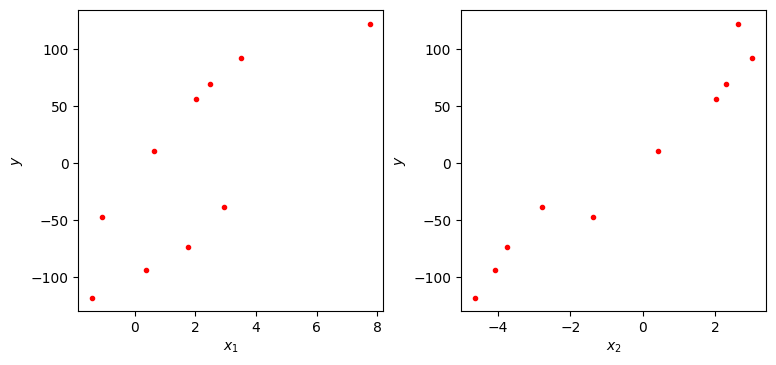

In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline

# Verdaderos coeficientes del modelo generador
c0 = -4
c1 = 9
c2 = 22

# Cantidad de datos
m  = 10

np.random.seed(12)
x1 = 2*np.random.randn(m) + 2
x2 = 3*np.random.randn(m) - 1
y  = c0 + c1*x1 + c2*x2 + 1.5*np.random.randn(m)

fig, ax = plt.subplots(1,2,figsize=(8,4))
fig.tight_layout(pad=2.5)
ax[0].plot(x1, y, 'r.')
ax[0].set_xlabel(r'$x_1$')
ax[0].set_ylabel(r'$y$')

ax[1].plot(x2, y, 'r.')
ax[1].set_xlabel(r'$x_2$')
ax[1].set_ylabel(r'$y$')

D1 = np.zeros((m,3))
D1[:,0] = x1
D1[:,1] = x2
D1[:,2] = y

Text(0.5, 0, '$y$')

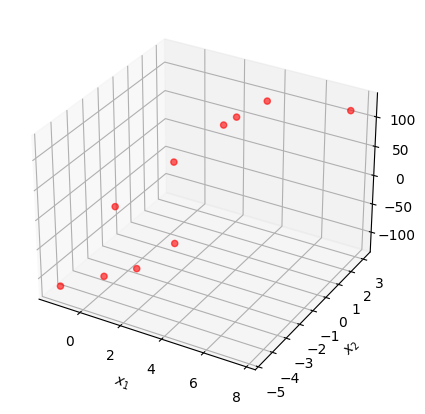

In [112]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (5, 5))
ax  = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y, marker='o', c="red", alpha=0.6)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$y$')

Aqui hacemos las pruebas

In [113]:
A  = np.ones((m,3))
A[:, 1] = x1
A[:, 2] = x2
c = solveLSM(A, y)
yp = c[0] + c[1]*x1 + c[2]*x2
c, RMSE(y, yp)

(array([-5.30934748,  9.07065845, 22.01463727]), 1.65267433005298)

Ahora graficamos el plano.


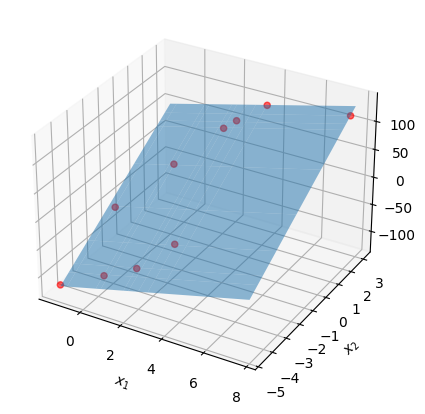

In [114]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (5, 5))
ax  = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y, marker='o', c="red", alpha=0.6)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$y$')

# geeneramos una malla de puntos
x1 = np.sort(x1)
x2 = np.sort(x2)
XX, YY = np.meshgrid(x1, x2)
z = c[0] + c[1]*XX + c[2]*YY
ax.plot_surface(XX, YY, z, alpha=0.5)


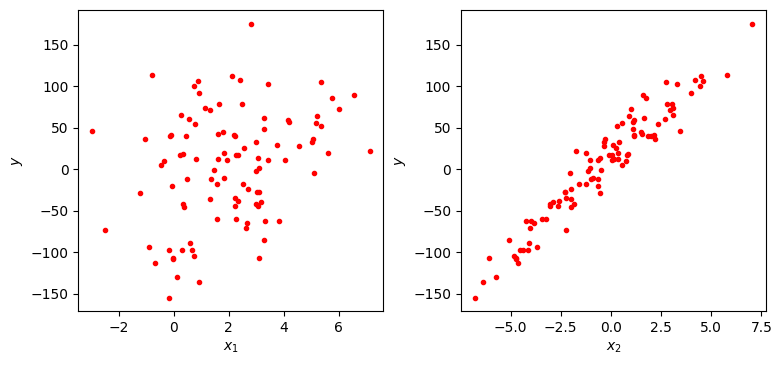

In [115]:
c0 = -4
c1 = 9
c2 = 22


m  = 100


np.random.seed(16)
x1 = 2*np.random.randn(m) + 2
x2 = 3*np.random.randn(m) - 1
y  = c0 + c1*x1 + c2*x2 + 1.5*np.random.randn(m)


fig, ax = plt.subplots(1,2,figsize=(8,4))
fig.tight_layout(pad=2.5)
ax[0].plot(x1, y, 'r.')
ax[0].set_xlabel(r'$x_1$')
ax[0].set_ylabel(r'$y$')

ax[1].plot(x2, y, 'r.')
ax[1].set_xlabel(r'$x_2$')
ax[1].set_ylabel(r'$y$')

D2 = np.zeros((m,3))
D2[:,0] = x1
D2[:,1] = x2
D2[:,2] = y

Text(0.5, 0, '$y$')

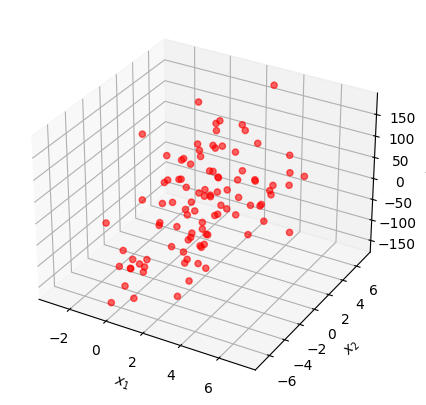

In [116]:
fig = plt.figure(figsize = (5, 5))
ax  = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y, marker='o', c="red", alpha=0.6)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$y$')

Aqui hacemos lo mismo

In [117]:
# Celda para las pruebas
A = np.ones((m, 3))
A[:, 1] = x1
A[:, 2] = x2

c = solveLSM(A, y)
yp = c[0] + c[1]*x1 + c[2]*x2
c, RMSE(y, yp)


(array([-4.18311214,  8.9992974 , 21.97480595]), 1.1984504505763716)

**Respuesta a la pregunta**




---

De lo anterior, podemos notar que mientras más datos el error
se reduce, pues el $RMSE$ es menor.

Además eso tiene sentido, pues al tener mas datos, como el ruido viene de una distribución uniforme, por la ley de grandes numero su promedio converge a su media la cual es cero.

---

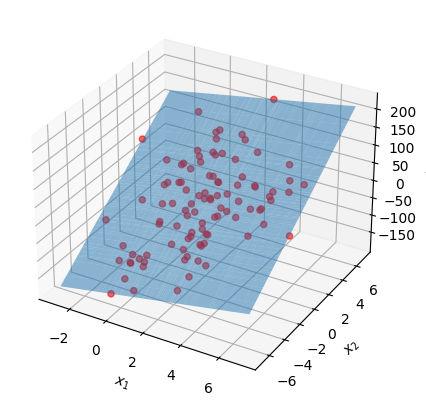

In [118]:
fig = plt.figure(figsize = (5, 5))
ax  = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y, marker='o', c="red", alpha=0.6)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$y$')
# geeneramos una malla de puntos
x1 = np.sort(x1)
x2 = np.sort(x2)
XX, YY = np.meshgrid(x1, x2)
z = c[0] + c[1]*XX + c[2]*YY
ax.plot_surface(XX, YY, z, alpha=0.5)


## Ejercicio 2 (5 puntos)

Resolver el poblema de mínimos cuadrados lineales para ajustar un polinomio
$p(x) = c_0 + c_1x_1 + c_2 x_2 + ... + c_n x^n$  a un conjunto de datos

$$\{(x_{1}, y_1), (x_{2}, y_2), (x_{3}, y_3), ..., (x_{m}, y_m)\},$$

de modo que $y_i = p(x_i) + \epsilon_i$, para $i=1,2,...,m$.


1. Escriba la matriz $\mathbf{A}$  que corresponde
   al problema de minimización  
   
$$ \min_x \| \mathbf{A}\mathbf{c} - \mathbf{y}  \|_2^2, $$

   donde $\mathbf{A}\mathbf{c}$ es igual al arreglo que tiene los
   valores $(p(x_1), p(x_2), ..., p(x_m))$ y
   
$$ \mathbf{c} = \begin{pmatrix} c_0 \\ c_1 \\ \vdots \\ c_n \end{pmatrix}, \quad \text{y} \quad
   \mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_m \end{pmatrix}.
$$

2. Escriba una función que calcule la solución del problema de mínimos
   cuadrados. Aplique la factorización de Cholesky para resolver el sistema
   de ecuaciones $\mathbf{A}^\top\mathbf{A}\mathbf{c} = \mathbf{A}^\top\mathbf{y}$.

**Entradas de la función:**
- La matriz $\mathbf{A}$,
- El arreglo $\mathbf{y}$.

**Salida de la función:**
- La función debe devolver el arreglo $\mathbf{c}$ de la solución
  del problema de minimos cuadrados o `None` si no se pudo obtenerla.
- El valor la raíz cuadrada del error cuadrático medio (RMSE).
   
3. Probar el algoritmo usando el arreglo de datos `D3` que se genera en una siguiente celda.
   
   Use la información en estos arreglos para definir la matriz $\mathbf{A}$ y
   el arreglo $\mathbf{y}$.
   
   Si el problema de mínimos cuadrados tiene solución, imprima la
   solución y el valor del RMSE usando polinomios de grado $n=1, 2, 3, 4, 5$
   
4. Escriba una función que genera una gráfica que muestre los datos y
   la gráfica del polinomio para apreciar el ajuste del modelo polinomial.
   Genere las gráficas para los polinomios de grado $n=1, 2, 3, 4, 5$.

$$
\mathbf{D} = \left[\begin{array}{cc}
x_{1}  & y_1 \\
x_{2}  & y_2 \\
\vdots & \vdots \\
x_{m}  & y_m \\
\end{array} \right]
$$

### Nota

Para generar la gráfica, puede seguir las notas de la ayudantía 6:

- Calcule el valor mínimo $x_{\min}$ y el valor máximo $x_{\max}$  de los valores $x_i$.
- Genere una partición $\{z_1, z_2, ..., z_r\}$ del intervalo $[x_{\min}, x_{\max}]$.
- Use un valor de $r$ como 100 para que se genere una cantidad suficiente de
  puntos de modo que al graficarlos se vea una curva suave.
- Como los coeficientes del modelo ya son conocidos, para evaluar el polinomio
  en cada punto $z_j$ se puede crear una matriz $\mathbf{B}$  similar a la matriz
  $\mathbf{A}$ usada para calcular los coeficientes, solo que en lugar de
  usar los valores $\{x_i\}$ se usan los valores $\{z_j\}$.
  
  El producto $\mathbf{B}\mathbf{c}$ es igual al arreglo
  $(p(z_1), p(z_2), ..., p(z_r))$. Con el arreglo $\{z_1, z_2, ..., z_r\}$ y
  $(p(z_1), p(z_2), ..., p(z_r))$ se puede generar la gráfica del polinomio.


### Solución:

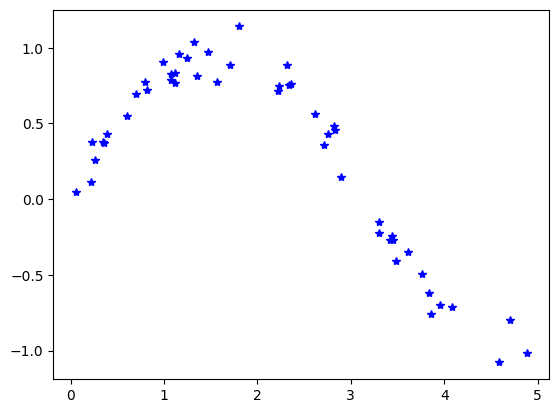

In [119]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline

# Cantidad de datos
m = 50

# Generacion de datos
np.random.seed(16)
x = 5*np.random.rand(m)
y = np.sin(x) + 0.1*np.random.randn(m)

plt.plot(x, y, 'b*')

D3 = np.zeros((m,2))
D3[:,0] = x
D3[:,1] = y

Notemos que el procedimiento es el mismo para este caso que para el caso de un plano, lo unico que cambia es la matriz $A$.

Por ello creemos una función que genere la matriz $A$ dado los datos y el grado
del polinomio al cual queremos aproximar.

In [120]:
# Celda para importar o programar la función que resuelve el problema de mínimos cuadrados
# y la que genera la gráfica del modelo

def matrizOfCoeffients(X: np.ndarray, n:int):
    return np.array([[x**i for i in range(n+1)] for x in X])

def polinomialAprox(x:np.ndarray, y:np.ndarray, n:int):
    """Creates """
    A = matrizOfCoeffients(x, n)
    t = np.finfo(float).eps**(2/3)
    return solveLSM(A.T@A, A.T@y)

def plotPolinomial(x: np.ndarray, y: np.ndarray, n:int):
    c = polinomialAprox(x, y, n)
    if c is None:
        return None
    xmin = min(x)
    xmax = max(x)
    z = np.linspace(xmin, xmax, 100)
    # yp = sum([c[i]*z**i for i in range(n+1)])
    B = matrizOfCoeffients(z, n)
    yp = B@c
    plt.plot(z, yp, label=f"Pol de grado {n}")



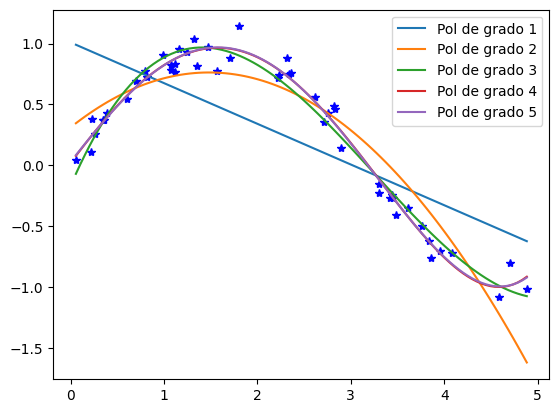

In [121]:
# Pruebas

import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline

# Cantidad de datos
m = 50

# Generacion de datos
np.random.seed(16)
x = 5*np.random.rand(m)
y = np.sin(x) + 0.1*np.random.randn(m)

plt.plot(x, y, 'b*')

D3 = np.zeros((m,2))
D3[:,0] = x
D3[:,1] = y

## Aqui ploteamos para cada grado de 1 a 5
for i in range(1, 6):
    plotPolinomial(x, y, i)
plt.legend()